# EJEMPLO COMPLETO APRENDIZAJE DE MAQUINAS - CLASIFICACIÓN - REGRESION.

Para este ejemplo quiero utilizar un dataset muy popular y muy usado para enseñar diversas técnicas de Machine Learning, la idea es tomar el dataset desde cero y aplicarle todas las herramientas a nuestra disposición para predecir la variable objetivo. La idea principal es estructurar los pasos a seguir en dicho análisis y la fundamentación de algunos conceptos ya en la práctica.

Las conclusiones extraidas de los datos son totalmente personales, realizadas bajo mi concepto en este camino de aprendizaje, y por ende pueden estar incorrectas, cualquer aporte a corregir y mejorar sería el resultado final de este trabajo.

### 0. Importar las librerias requeridas.

Como método personal yo prefiero importar todas las librarías de mi código al inicio del modelo, no importo cada que necesito sino que todas las librerias las importo en el mismo set de código, esto me permite tener control de todas las librarías usadas.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0. Cargar la data.

Cargar la data es por supuesto una tarea vital, aunque uno no lo crea, este paso es fundamental y si se hace mal el modelo presentará grandes fallas en su desarrollo.

In [3]:
os.chdir('E:\Backup Sergio IPROCOM\Documentos\SMARIN\SAMP\MaestriaAnalitica\BLOG ANALITICA\Datasets\winequality\winequality')
df_vinos = pd.read_csv('winequality-white.csv', sep = ';')
df_vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1. EDA. (Exploratory Data Analysis) - Exploración y análisis de los datos.

Explorar y conocer los datos que vamos a trabajar es fundamental, uno no puede predecir o tratar de solucionar un problema de algo que no conoce, es por ello que es este quizas, en mi opinión, en donde se pinta el panorama claro de como solucionar y como hacer la aproximación a la solución del problema.

Como pudimos ver en el .head() del data frame la data consta de algunas características de calidad del vino blanco, cada columna es una característica y cada fila es una medición o los resultados de la examinación de una muestra. Todas estas características juntas arrojan un resultado, un valor de calidad, que es la columna objetivo, mi cliente quiere que yo pueda entregarle un modelo que dadas esas características como el 'citric acid' o el 'alcohol' o el 'ph' el modelo sea capaz de prececir la calidad del vino.

Como yo quiero entender muy bien tanto los algunos algoritmos de Clasificación como los de Regresión, quiero usar el mismo DataSet, por ejemplo, para clasificación yo voy a convertir la columa calidad en una calumna categorica, es decir, si la calidad es > 5, calidad será igual a 'SI' y si es menor que 5, calidad será igual a 'NO'. Para Regresión lo dejaré tal cual esta pues quiero por regresión predecir el valor de Calidad.

Clasificación: La variable objetivo es Categorica.

Regresión: La variable objetivo es continua.


Por el momento vamos a conocer el Dataset tal cual lo importamos:

Para esto usamos los métodos pd.info(), pd.describe() y pd.head().

In [4]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Lo primero a analizar es si todas las columnas contienen la misma cantidad de datos.

Posterior yo suelo revisar las unidades de medida de cada variable, como se puede observar hay una viriedad en la escala de cada variable, por ejemplo, el máximo valor de densidad es de 1.03 y el máximo valor de 'residual sugar' es de 65.8 y el máximo de 'total sulfur dioxide' es de 440. 

La escala de cada variable no es comparable con las demás variables. Ese es un tema que debe solucionarse mediante la Normalización, este es un paso mas adelante cuando iniciemos el modelo de Machine Learning.

#### Conozcamos nuestra variable objetivo: Calidad.

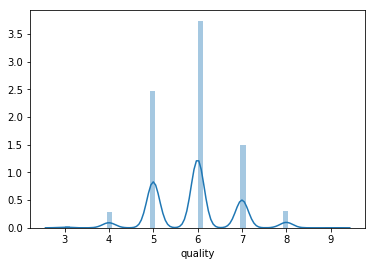

In [6]:
# Histograma de la variable 'quality'

sns.distplot(df_vinos['quality']);

Lo que el histograma me dice es que se puede observar un comportamiento de distribución Normal.

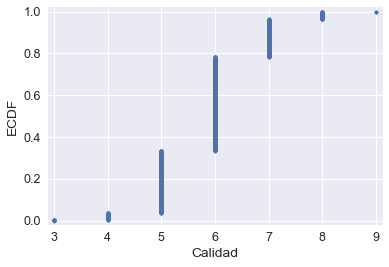

In [18]:
# Crear un gráfico ECDF.

#Se crea el np.array x y se ordena la columna 'quality'
x = np.sort(df_vinos['quality'])

# Se crea el eje y con np.arange el cual distribuye los valores del intervalo 
# en espacios iguales.
y = np.arange(1, len(x)+1)/len(x)

# Se crea el grafico con Matplotlib.
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Calidad')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

Para una mayor claridad se grafica la ECDF que es la Empirical cumulative density funtion la cual permite como de distribuyen los datos, es decir, de este grafico podemos concluir que menos del 40% de los datos obtienen calificación de calidad de 5 y que el 80% de los datos tiene calificación menor o igual que 6. 

#### Análisis de variables categoricas ('quality') versus variables numericas

Ahora es hora de comprender que relación tiene 'quality' con las otras variables, de ese modo podemos conocer cuales variables influyen mas en que la calidad sea mas alta.

Dado que 'qualty' es una variable categorica (variable que da una categoria y cuyos grupos son mutuamente excluyentes) se analizará con graficos boxplot ya que nos permite visualmente comprender las diferencias entre las categorias.

Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity', 'chlorides', 'density'],
      dtype='object')


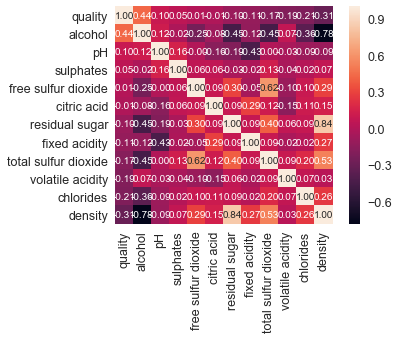

In [25]:
# Heat map (librería seaborn)

# se crea la matriz de correlación con la función .corr() de Pandas
corrmat =  df_vinos.corr()

k = 12 #numero de variables para el grafico. Pueden ser las 5 con corr mas positiva
# ó las 12 variables para analizar las correlaciones negativas.

# se obtienen los datos de las columnas que se quieren analizar según el k elegido
cols =  corrmat.nlargest(k, 'quality')['quality'].index
print(cols)

# se crea la matrizx de correlacion con Numpy
cm = np.corrcoef(df_vinos[cols].values.T) 

# se inicia creación de gráfico con seaborn
sns.set(font_scale=1.25) 


hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

El grado de alcohol es directamente proporcional a la calidad del vino; Pero no es la única conclusión, de hecho, hay correlaciones positivas y negativas de las cuales podemos concluir muchas cosas.

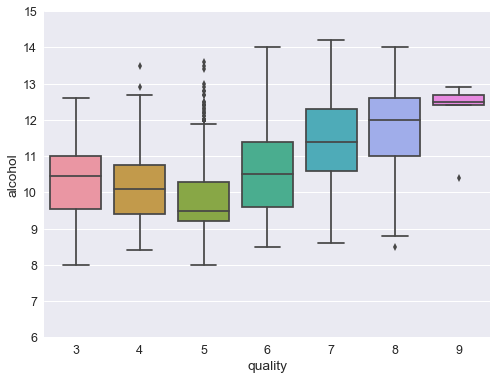

In [26]:
# Boxplot alcohol/quality


# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos['alcohol'], df_vinos[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='alcohol', data=data)
fig.axis(ymin=6,ymax=15);

Los vinos de mayor calidad contienen en promedio un nivel de alcohol mas alto y definitivamente los niveles de alhohol mas elevados corresponden a vinos de mayor calidad, sin embargo, no es la única característica que determina la calidad de un buen vino blanco.

Es decir, que si un vino blanco presenta un grado de alcohol de 12,5 no necesariamente es un vino de calidad mayor a 7 ya que hay vinos con ese grado de alcohol de calidad 3.


Analicemos una variable mas, density.

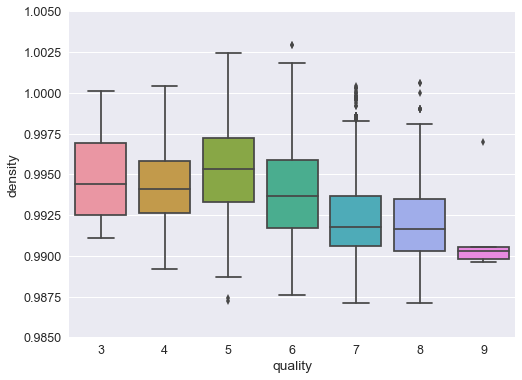

In [31]:
# Boxplot density/quality


# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos['density'], df_vinos[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='density', data=data)
fig.axis(ymin=0.985,ymax=1.005);

Definitivamente hay una correlación negativa entre la densidad y la calidad del vino, los vinos de mayor calidad son menos densos que los vinos de menor calidad, sin embargo, hay vinos de densidad entre 0.9875 y 0.9900 que son de calidad 4. Por esto no es la única característica que nos define la calidad de un vino blanco.